In [1]:
import pandas as pd
import numpy as np
#from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('C:\\Users\\Harisankar.Suresh\\Desktop\\New folder\\A1C2C0088854.xlsx',sheet_name='step')

In [162]:
df=df[(df['Step Index']==2)]       # getting charging data

In [163]:
df.columns

Index(['Cycle Index', 'Step Index', 'Step Number', 'Step Type', 'Step Time',
       'Oneset Date', 'End Date', 'Capacity(Ah)', 'Spec. Cap.(mAh/g)',
       'Chg. Cap.(Ah)', 'Chg. Spec. Cap.(mAh/g)', 'DChg. Cap.(Ah)',
       'DChg. Spec. Cap.(mAh/g)', 'Net DChg. Cap.(Ah)', 'Energy(Wh)',
       'Spec. Energy(mWh/g)', 'Chg. Energy(Wh)', 'Chg. Spec. Energy(mWh/g)',
       'DChg. Energy(Wh)', 'DChg. Spec. Energy(mWh/g)', 'Net DChg. Energy(Wh)',
       'Super Capacitor(F)', 'Oneset Volt.(V)', 'Chg. Oneset Volt.(V)',
       'DChg. Oneset Volt.(V)', 'End Volt.(V)', 'End of Chg.Volt.(V)',
       'End of DChg.Volt.(V)', 'Chg. Med. Volt.(V)', 'DChg. Med. Volt.(V)',
       'Starting current(A)', 'Termination current(A)', 'DCIR(mΩ)'],
      dtype='object')

In [177]:
df2=df.loc[:,['Oneset Date','Chg. Spec. Energy(mWh/g)']]     # creating a data frame conataining only oneset date , and specific charge.

In [178]:
df2.head()

,Oneset Date,Chg. Spec. Energy(mWh/g)
1,2022-08-03 11:47:21,9529824.00
5,2022-08-03 14:53:30,10560739.56
9,2022-08-03 18:15:28,10578697.78
13,2022-08-03 21:33:35,10719677.33
17,2022-08-04 00:53:21,10732250.67


pd.Timestamp() is a function that converts a datetime-like string or object to a Pandas Timestamp.

In [179]:
# df2['Oneset Date'] = [pd.Timestamp(i) for i in df2['Oneset Date']]      
# df2.head()


In [180]:
type(df2['Oneset Date'][1])

str

In [181]:
df2.columns=['Date','energy']           #renaming the columns


In [182]:
df2['Date'][5]

'2022-08-03 14:53:30'

In [183]:
df2.head()

,Date,energy
1,2022-08-03 11:47:21,9529824.00
5,2022-08-03 14:53:30,10560739.56
9,2022-08-03 18:15:28,10578697.78
13,2022-08-03 21:33:35,10719677.33
17,2022-08-04 00:53:21,10732250.67


In [184]:
df2['date']=df2['Date'].str.split(' ').str[0]      #splitting the values in "Date" column by 'space' and getting the 1st value ie the actual date. 
df3=df2.reset_index(drop=True)

df3=df3.drop('Date',axis=1)                         #dropping the 'Date' 

In [185]:
df3=df3[df3.index%10==0]                            # getting data at inteval of 10.

In [186]:
df3.head()

,energy,date
0,9529824.00,2022-08-03
10,10698609.78,2022-08-04
20,10702861.33,2022-08-06
30,10545277.33,2022-08-08
40,10720422.22,2022-08-09


In [187]:
from datetime import datetime, timedelta
df3['date']=pd.to_datetime(df3['date'])

We are setting our date column as our index, because generally it helps in making time series function. Here however we'll again replace our date index by normal index value (cause it has different value on the same date, so the 'index' whould not be unique.)

In [188]:
df3.set_index('date',inplace=True)
df3.head()


,energy
date,
2022-08-03,9529824.00
2022-08-04,10698609.78
2022-08-06,10702861.33
2022-08-08,10545277.33
2022-08-09,10720422.22


Text(0, 0.5, 'energy')

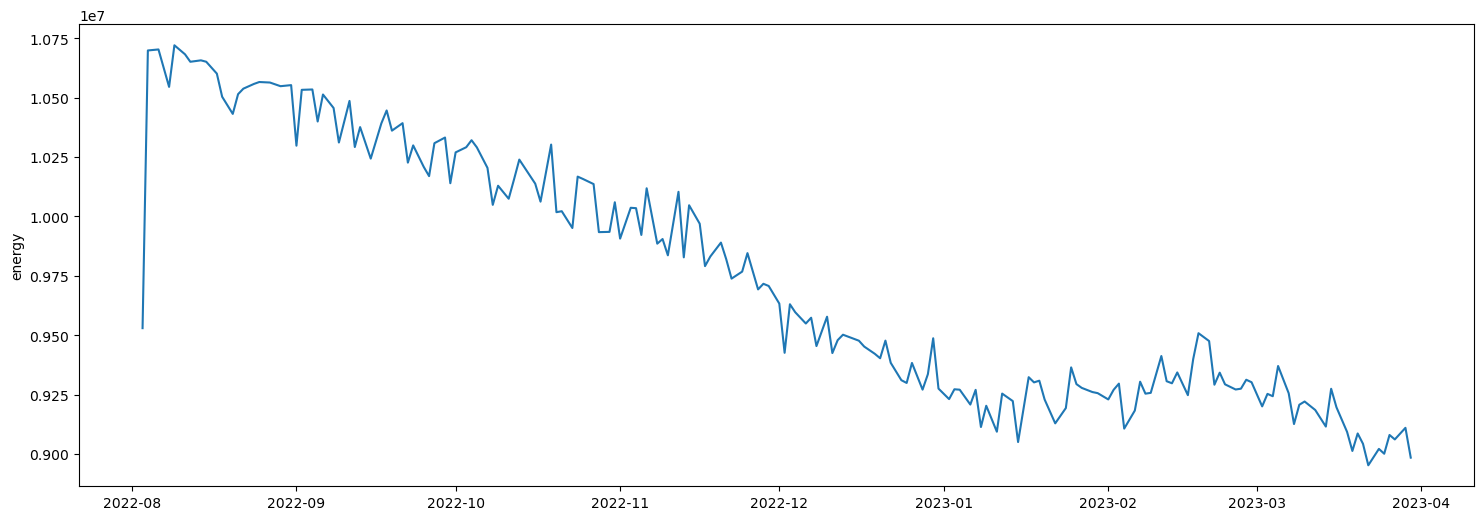

In [189]:
plt.figure(figsize=(18,6)) #plotting energy v/s date.
plt.plot(df3['energy'])
plt.ylabel("energy")


### Testing For Stationarity

In [190]:
from statsmodels.tsa.stattools import adfuller

In [191]:
#in adfuler tets if our p value is less than 0.05 then it is stationary


def adfuller_test(energy):
    result=adfuller(energy)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [192]:
adfuller_test(df3['energy'])            # tetsing our DF3 data

ADF Test Statistic : -1.438121588094455
p-value : 0.5638699367175527
#Lags Used : 6
Number of Observations Used : 172
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [193]:
df3['energy1diff'] = df3['energy'] - df3['energy'].shift(1)     #since it is greater then 0.05 therefore we'll take the diff of enegry and its next value.

In [ ]:
# df3=df3.reset_index()

In [197]:
df3.head()

,energy,energy1diff
date,,
2022-08-03,9529824.00,NaN
2022-08-04,10698609.78,1168785.78
2022-08-06,10702861.33,4251.55
2022-08-08,10545277.33,-157584.00
2022-08-09,10720422.22,175144.89


In [195]:
adfuller_test(df3['energy1diff'].dropna())      #since now its less than 0.05 therefore now its stationary

ADF Test Statistic : -8.738717296916619
p-value : 3.049926293674824e-14
#Lags Used : 5
Number of Observations Used : 172
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Text(0.5, 0, 'Index')

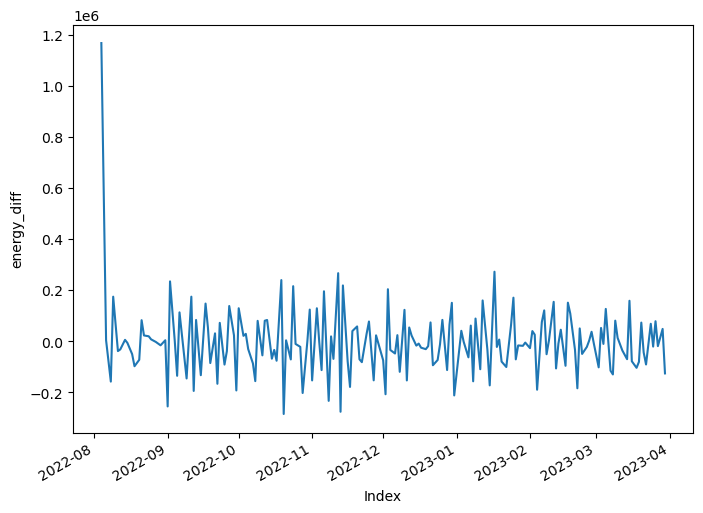

In [198]:
df3['energy1diff'].plot(figsize=(8,6))
plt.ylabel("energy_diff")
plt.xlabel('Index')



# plotting ACF and PACF plots to lookmfor orders of AR and MA

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


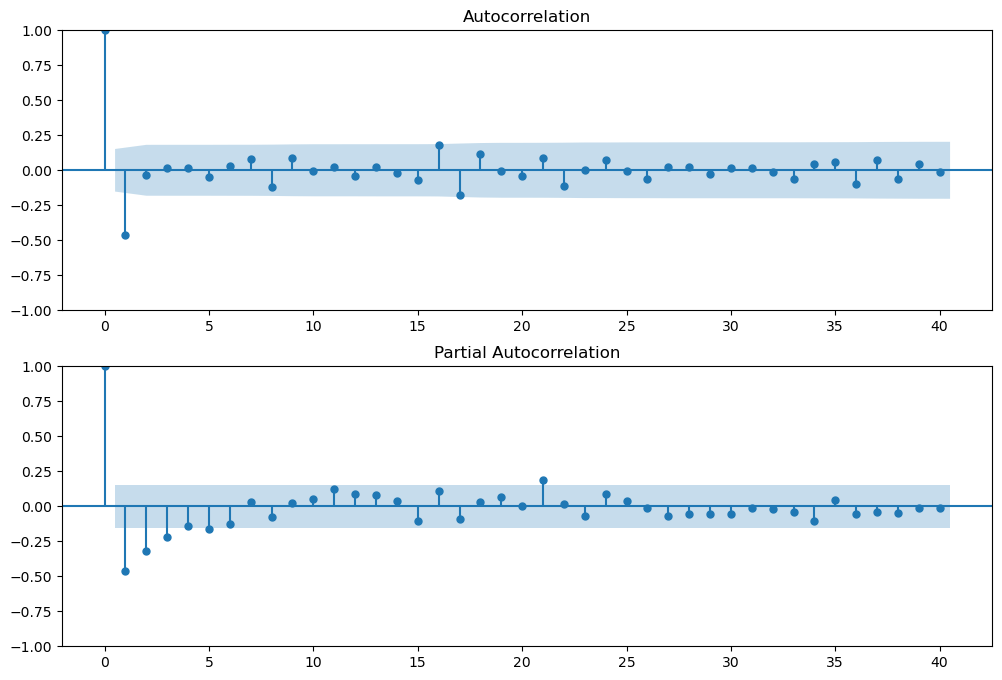

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df3['energy1diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df3['energy1diff'].iloc[13:],lags=40,ax=ax2)

Applying ARIMA model on this DATA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [199]:
# from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
# 4,1,2 ARIMA Model got from PACF and ACF plot.
model = ARIMA(df3['energy'], order=(4,1,2)) #putting the df3 energy into arima model with order defined into "Model"
model_fit = model.fit()    # calling the model.fit function in a model_fit
print(model_fit.summary())


c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 energy   No. Observations:                  179
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -2332.769
Date:                Wed, 12 Jul 2023   AIC                           4679.538
Time:                        16:35:25   BIC                           4701.810
Sample:                             0   HQIC                          4688.570
                                - 179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2890     22.289     -0.013      0.990     -43.975      43.398
ar.L2          0.6054     19.411      0.031      0.975     -37.440      38.651
ar.L3         -0.0744      2.165     -0.034      0.9

<Axes: xlabel='date'>

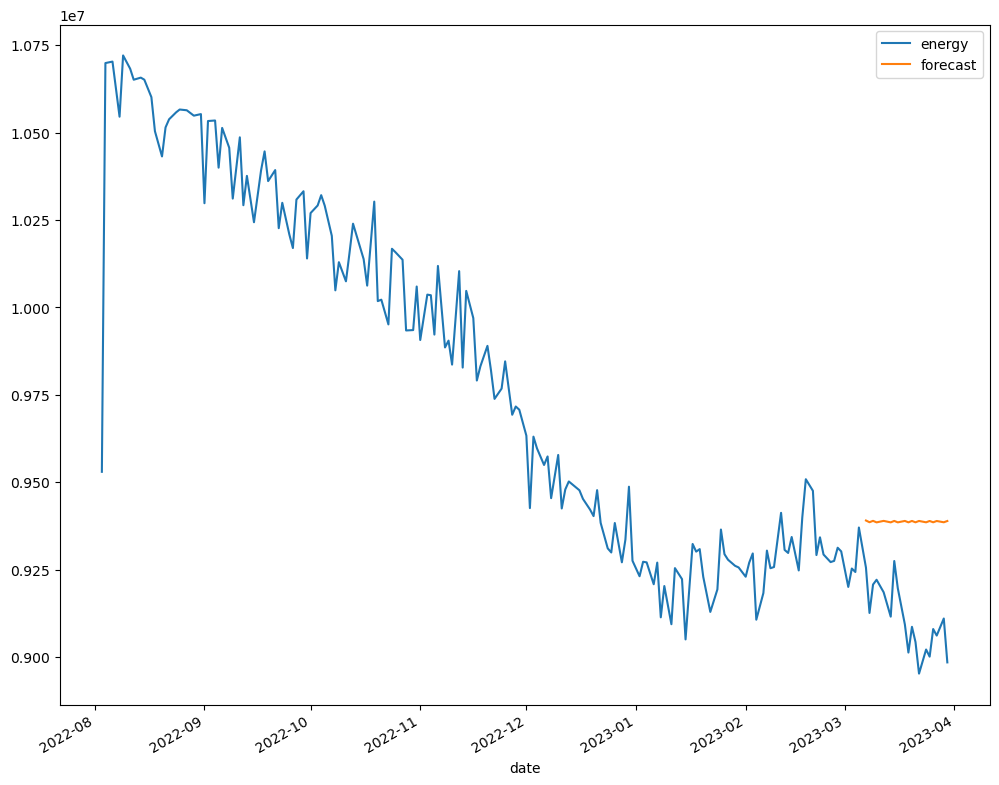

In [201]:
df3['forecast']=model_fit.predict(start=160,end=178,dynamic=True)       # creating a new column in df3 for storing the predicted value
df3[['energy','forecast']].plot(figsize=(12,10))

Here we can see that our predicted value is totaly different from the actual value.

In [204]:
import statsmodels.api as sm

In [312]:
model=sm.tsa.statespace.SARIMAX(df3['energy'],order=(3, 1, 1),seasonal_order=((1,1,0,4)))
results=model.fit()

c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Harisankar.Suresh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

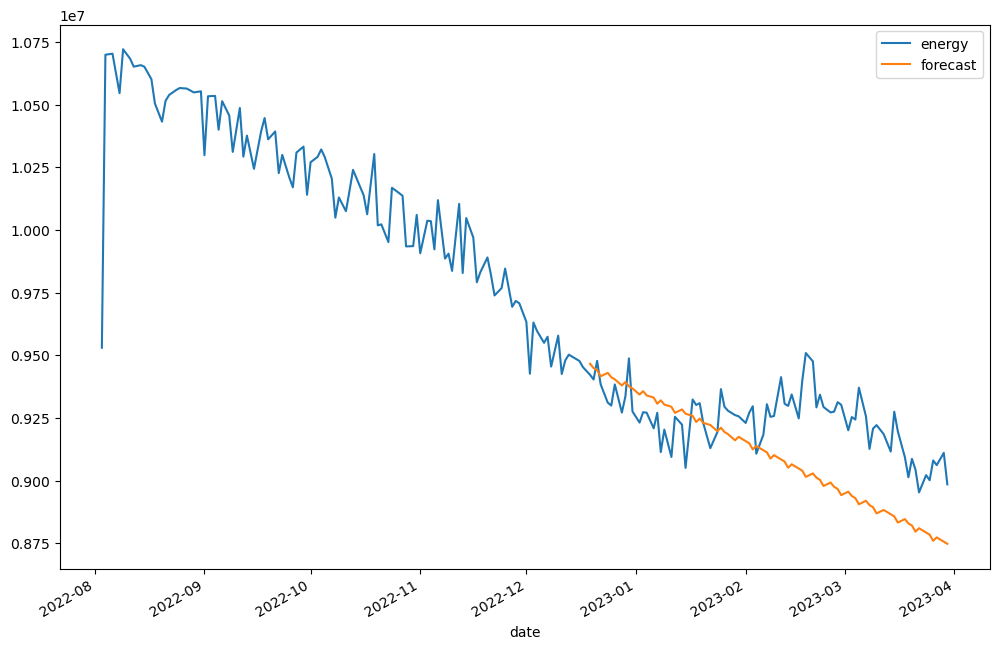

In [313]:
df3['forecast']=results.predict(start=100,end=178,dynamic=True)
df3[['energy','forecast']].plot(figsize=(12,8))